### Objectives
* Understanding Unsupervised Learning
* What is Clustering
* Types of Clustering
* KMeans

<hr>

### Unsupervised Learning
* There is no target information
* All we do is find relationship between data
* No easy way to verify if you have a good modeling or not 
* Clustering is a type of unsupervised learning

### Clustering
* Find similar data & cluster/group them together
* Types of cluster - Partitioning & Hierarchial

### Partitioning based Clustering
* Find clusters connected to same centroid

* For n Points what will be the centroid
* (xn+ ... + x2+x1)/n, (yn + ... +y2+y1)/n 

In [3]:
from sklearn.datasets import make_blobs

In [31]:
X,y = make_blobs(n_features=2, n_samples=1000, shuffle=10, cluster_std=2)

In [32]:
import matplotlib.pyplot as plt

In [33]:
%matplotlib inline

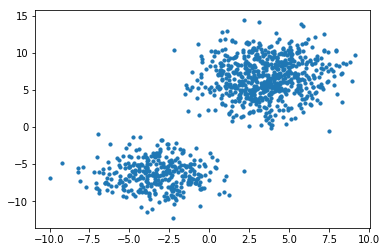

In [34]:
plt.scatter(X[:,0],X[:,1], s=10)

In [13]:
from sklearn.cluster import KMeans

In [35]:
kmeans = KMeans(n_clusters=2)

In [36]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
kmeans.labels_[:10]

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int32)

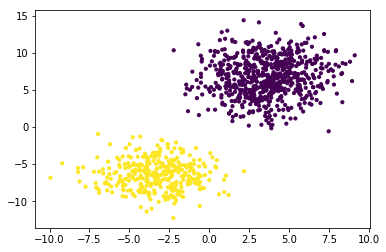

In [38]:
plt.scatter(X[:,0],X[:,1], s=10,c=kmeans.labels_)

In [39]:
import pandas as pd

/home/awantik/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [42]:
house_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt',index_col='Unnamed: 0')

In [43]:
house_data.sample(10)

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
53,711.600,2,3,2,2,1,32500
214,384.264,2,9,1,1,1,35000
258,718.716,5,12,2,1,1,34800
394,1099.422,2,7,4,2,2,58500
463,1206.162,7,7,2,2,1,57000
162,1565.520,2,6,3,2,1,45000
625,4198.440,15,19,7,3,4,180000
116,1423.200,7,14,3,2,2,92000
448,3241.338,7,7,2,2,3,99999
572,711.600,6,6,2,1,1,17000


In [44]:
house = house_data[['Sqft','Price']]

In [45]:
kmeans = KMeans(n_clusters=3)

In [46]:
kmeans.fit(house)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [50]:
house['type'] = kmeans.labels_

/home/awantik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
house.sample(10)

,Sqft,Price,type
307,2052.966,77999,2
626,3095.460,100000,2
569,1544.172,98000,2
99,1707.840,55000,0
599,1458.780,36000,0
174,1707.840,80000,2
107,1786.116,98000,2
302,2700.522,100000,2
130,1184.814,38000,0
288,1661.586,50000,0


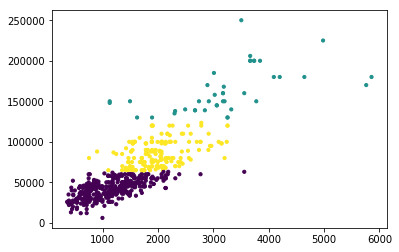

In [53]:
plt.scatter(house.Sqft, house.Price,c=house.type,s=10)

### Image compression using KMeans

In [55]:
from skimage.io import imread,imshow

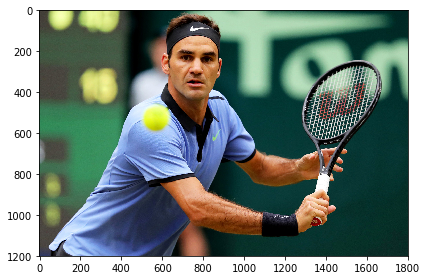

In [56]:
imshow('/home/awantik/Pictures/roger_federer_2.jpg')

In [57]:
img = imread('/home/awantik/Pictures/roger_federer_2.jpg')

In [58]:
img.shape

(1200, 1800, 3)

* Image processing needs them to converted in scale of 0-1

In [60]:
img = img/255

In [61]:
img.shape

(1200, 1800, 3)

* Similar color pixel belongs to same cluster
* The centroid of the cluster will be representing the entire cluster

In [78]:
kmeans = KMeans(n_clusters=6)

In [63]:
img_tf = img.reshape(1200*1800,3)

In [64]:
img_tf.shape

(2160000, 3)

In [79]:
kmeans.fit(img_tf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [80]:
kmeans.cluster_centers_

array([[0.04156234, 0.17168538, 0.16679236],
       [0.44072921, 0.5717016 , 0.66521842],
       [0.25399589, 0.38650634, 0.32956507],
       [0.82604157, 0.69460142, 0.44037373],
       [0.70640536, 0.81768248, 0.81947616],
       [0.55559706, 0.30984687, 0.15864307]])

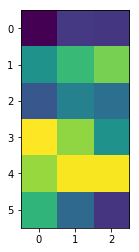

In [81]:
plt.imshow(kmeans.cluster_centers_)

In [82]:
img_com = kmeans.cluster_centers_[[kmeans.labels_]]

/home/awantik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


* Reaplce color of each pixel by its centroid's color

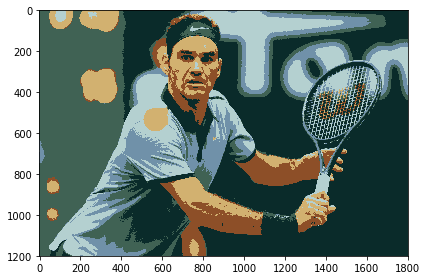

In [83]:
imshow(img_com.reshape(1200,1800,3))